In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Read and Explore data

In [2]:
df= pd.read_csv("Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [6]:
df.shape

(300153, 11)

In [7]:
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [8]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
x=df.duplicated().sum()
print("Number of duplicated : "+str(x))

Number of duplicated : 0


<Axes: >

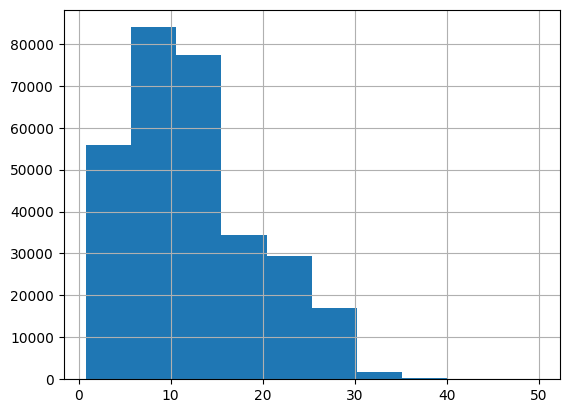

In [10]:
df['duration'].hist()

<Axes: >

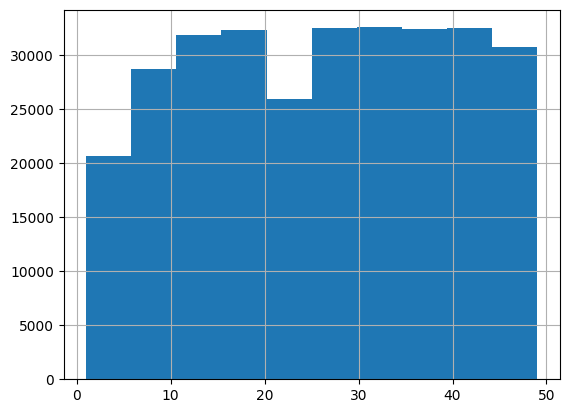

In [11]:
df['days_left'].hist()

In [12]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [13]:
airline_stats = df.groupby('airline')['price'].agg(['mean', 'median', 'std']).reset_index()
airline_stats

,airline,mean,median,std
0,AirAsia,4091.072742,3276.0,2824.055172
1,Air_India,23507.019112,11520.0,20905.116909
2,GO_FIRST,5652.007595,5336.0,2513.865560
3,Indigo,5324.216303,4453.0,3268.894831
4,SpiceJet,6179.278881,5654.0,2999.630406
5,Vistara,30396.536302,15543.0,25637.159445


C:\Users\sondo\AppData\Local\Temp\ipykernel_9136\3538427317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='airline', y='price', palette='viridis')


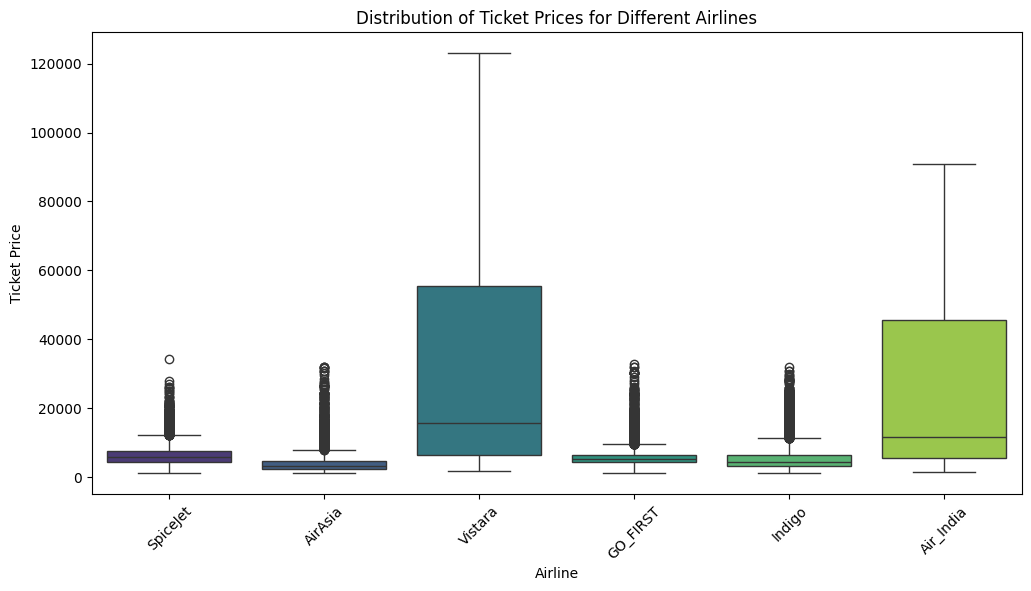

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='airline', y='price', palette='viridis')
plt.title('Distribution of Ticket Prices for Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Ticket Price')
plt.xticks(rotation=45)
plt.show()

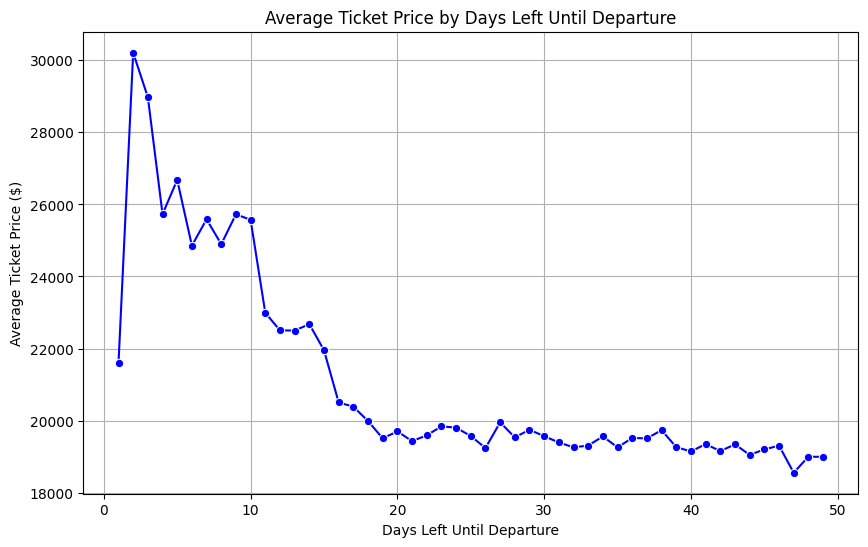

In [15]:
days_left_groups = df.groupby('days_left')['price'].mean().reset_index()

# Visualize the trend using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=days_left_groups, x='days_left', y='price', marker='o', color='blue')
plt.title('Average Ticket Price by Days Left Until Departure')
plt.xlabel('Days Left Until Departure')
plt.ylabel('Average Ticket Price ($)')
plt.grid(True)
plt.show()

C:\Users\sondo\AppData\Local\Temp\ipykernel_9136\157305800.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=departure_time_groups.index, y=departure_time_groups.values,  palette=['green','darkgreen','bisque', 'darkcyan'])
C:\Users\sondo\AppData\Local\Temp\ipykernel_9136\157305800.py:12: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(ax=axs[0], x=departure_time_groups.index, y=departure_time_groups.values,  palette=['green','darkgreen','bisque', 'darkcyan'])
C:\Users\sondo\AppData\Local\Temp\ipykernel_9136\157305800.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1], x=

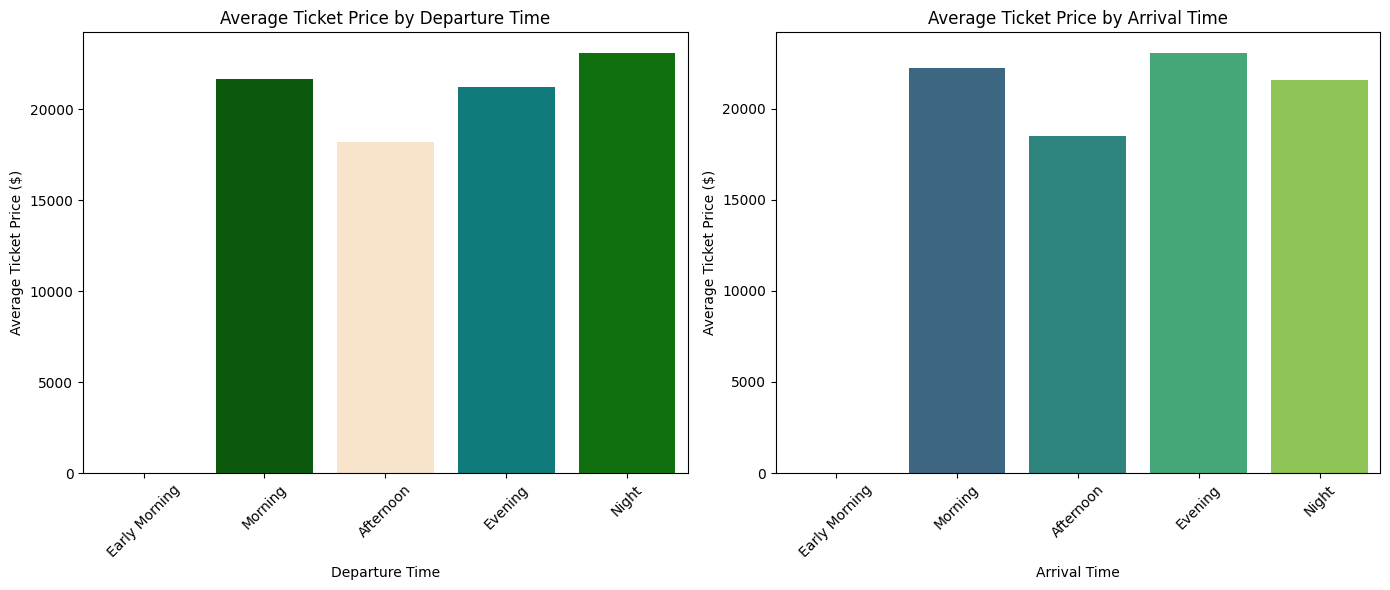

In [16]:
departure_time_categories = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
arrival_time_categories = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# Group the data based on departure time and arrival time categories
departure_time_groups = df.groupby('departure_time')['price'].mean().reindex(departure_time_categories)
arrival_time_groups = df.groupby('arrival_time')['price'].mean().reindex(arrival_time_categories)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot average ticket price by departure time
sns.barplot(ax=axs[0], x=departure_time_groups.index, y=departure_time_groups.values,  palette=['green','darkgreen','bisque', 'darkcyan'])
axs[0].set_title('Average Ticket Price by Departure Time')
axs[0].set_xlabel('Departure Time')
axs[0].set_ylabel('Average Ticket Price ($)')
axs[0].tick_params(axis='x', rotation=45)

# Plot average ticket price by arrival time
sns.barplot(ax=axs[1], x=arrival_time_groups.index, y=arrival_time_groups.values, palette='viridis')
axs[1].set_title('Average Ticket Price by Arrival Time')
axs[1].set_xlabel('Arrival Time')
axs[1].set_ylabel('Average Ticket Price ($)')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [17]:

# Group the data based on departure time and arrival time categories
departure_time_groups = df.groupby('departure_time')['price'].mean().reindex(departure_time_categories)
arrival_time_groups = df.groupby('arrival_time')['price'].mean().reindex(arrival_time_categories)

# Print the average ticket price by departure time
print("Average Ticket Price by Departure Time:")
print(departure_time_groups)

# Print the average ticket price by arrival time
print("\nAverage Ticket Price by Arrival Time:")
print(arrival_time_groups)

Average Ticket Price by Departure Time:
departure_time
Early Morning             NaN
Morning          21630.760254
Afternoon        18179.203331
Evening          21232.361894
Night            23062.146808
Name: price, dtype: float64

Average Ticket Price by Arrival Time:
arrival_time
Early Morning             NaN
Morning          22231.076098
Afternoon        18494.598993
Evening          23044.371615
Night            21586.758341
Name: price, dtype: float64


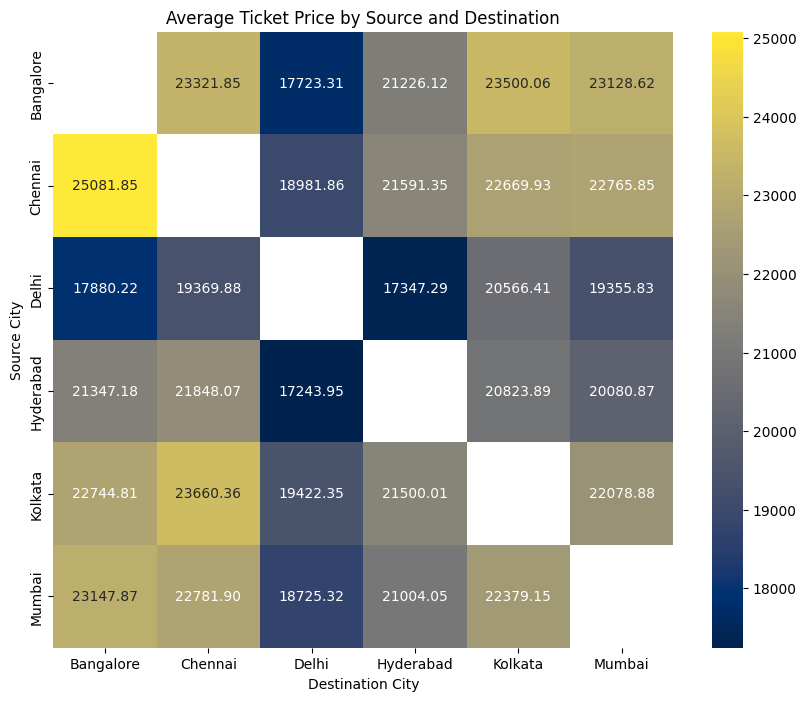

In [18]:
source_destination_groups = df.groupby(['source_city', 'destination_city'])['price'].mean().unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(source_destination_groups, annot=True, cmap='cividis', fmt='.2f')  # Change 'coolwarm' to your desired colormap
plt.title('Average Ticket Price by Source and Destination')
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.show()

In [19]:
airline_and_class = df.groupby('airline')['class'].value_counts()
airline_and_class

airline    class   
AirAsia    Economy     16098
Air_India  Economy     47994
           Business    32898
GO_FIRST   Economy     23173
Indigo     Economy     43120
SpiceJet   Economy      9011
Vistara    Economy     67270
           Business    60589
Name: count, dtype: int64

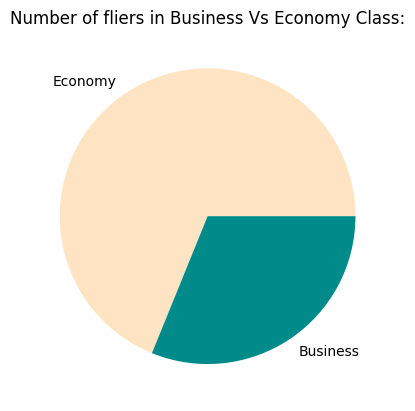

In [20]:
class_counts = df['class'].value_counts()
colors =['bisque', 'darkcyan']
class_counts.plot(kind='pie', colors=colors)
plt.title("Number of fliers in Business Vs Economy Class:")
plt.ylabel('')
plt.show()

# Assuming you have already calculated price_by_airline_class DataFrame

# Plotting the grouped bar chart using matplotlib



Descriptive Statistics for Economy Class:
count    206666.000000
mean       6572.342383
std        3743.519517
min        1105.000000
25%        4173.000000
50%        5772.000000
75%        7746.000000
max       42349.000000
Name: price, dtype: float64

Descriptive Statistics for Business Class:
count     93487.000000
mean      52540.081124
std       12969.314606
min       12000.000000
25%       45185.000000
50%       53164.000000
75%       60396.000000
max      123071.000000
Name: price, dtype: float64


C:\Users\sondo\AppData\Local\Temp\ipykernel_9136\955035610.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='price', data=df, palette='viridis')


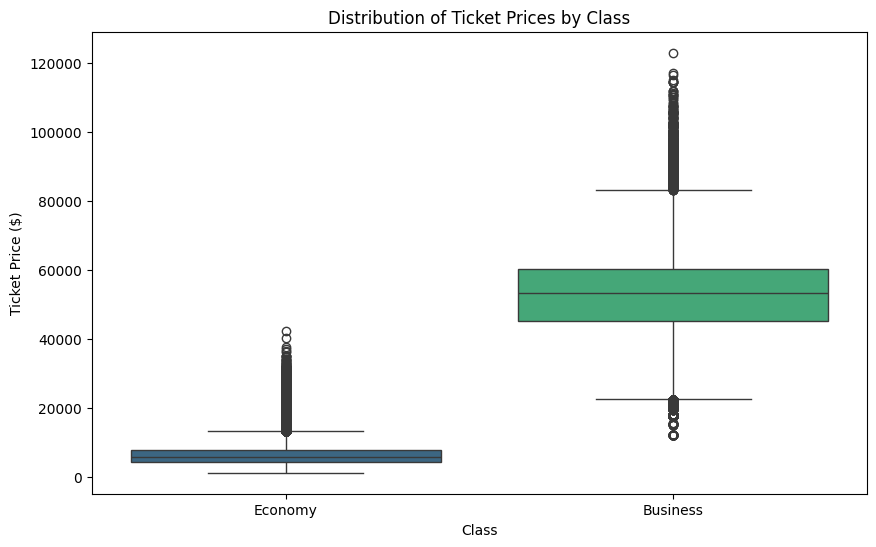

In [21]:

economy_prices = df[df['class'] == 'Economy']['price']
business_prices = df[df['class'] == 'Business']['price']

economy_stats = economy_prices.describe()
business_stats = business_prices.describe()

# Print the descriptive statistics
print("Descriptive Statistics for Economy Class:")
print(economy_stats)
print("\nDescriptive Statistics for Business Class:")
print(business_stats)

# Visualize the distribution using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=df, palette='viridis')
plt.title('Distribution of Ticket Prices by Class')
plt.xlabel('Class')
plt.ylabel('Ticket Price ($)')
plt.show()


In [22]:
price_by_stops = df.groupby('stops')['price'].mean().reset_index()

price_by_stops



,stops,price
0,one,22900.992482
1,two_or_more,14113.450775
2,zero,9375.938535


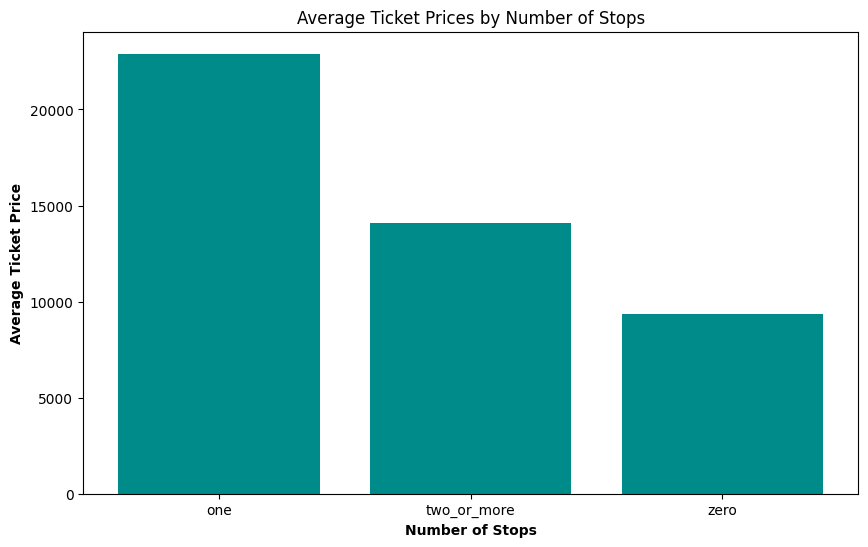

In [23]:

# Plotting the bar plot  
plt.figure(figsize=(10, 6))
plt.bar(price_by_stops['stops'], price_by_stops['price'], color="darkcyan")
plt.xlabel('Number of Stops', fontweight='bold')
plt.ylabel('Average Ticket Price', fontweight='bold')
plt.title('Average Ticket Prices by Number of Stops')
plt.show()

C:\Users\sondo\AppData\Local\Temp\ipykernel_9136\2454343380.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0],  palette=['bisque', 'darkcyan']  )
C:\Users\sondo\AppData\Local\Temp\ipykernel_9136\2454343380.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1],  palette=['bisque', 'darkcyan']  )


Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

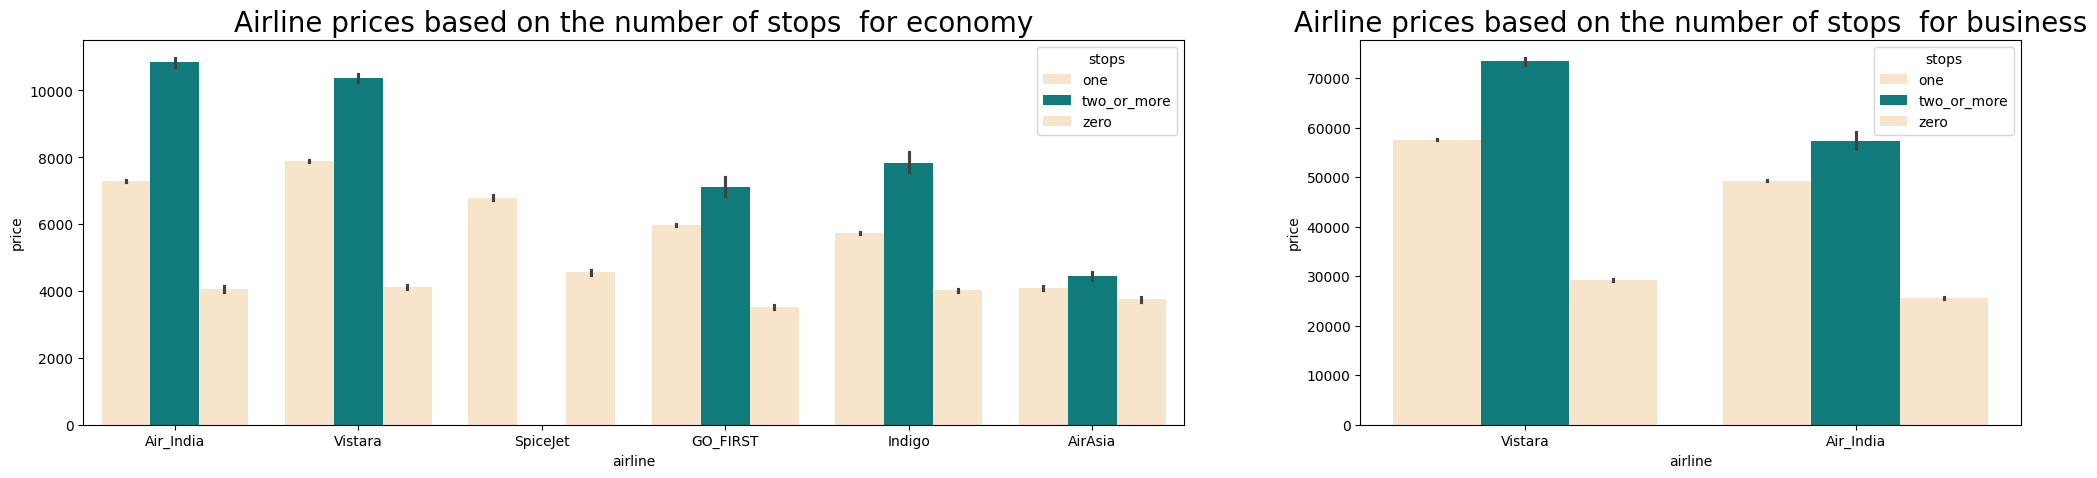

In [24]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0],  palette=['bisque', 'darkcyan']  )
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1],  palette=['bisque', 'darkcyan']  )
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

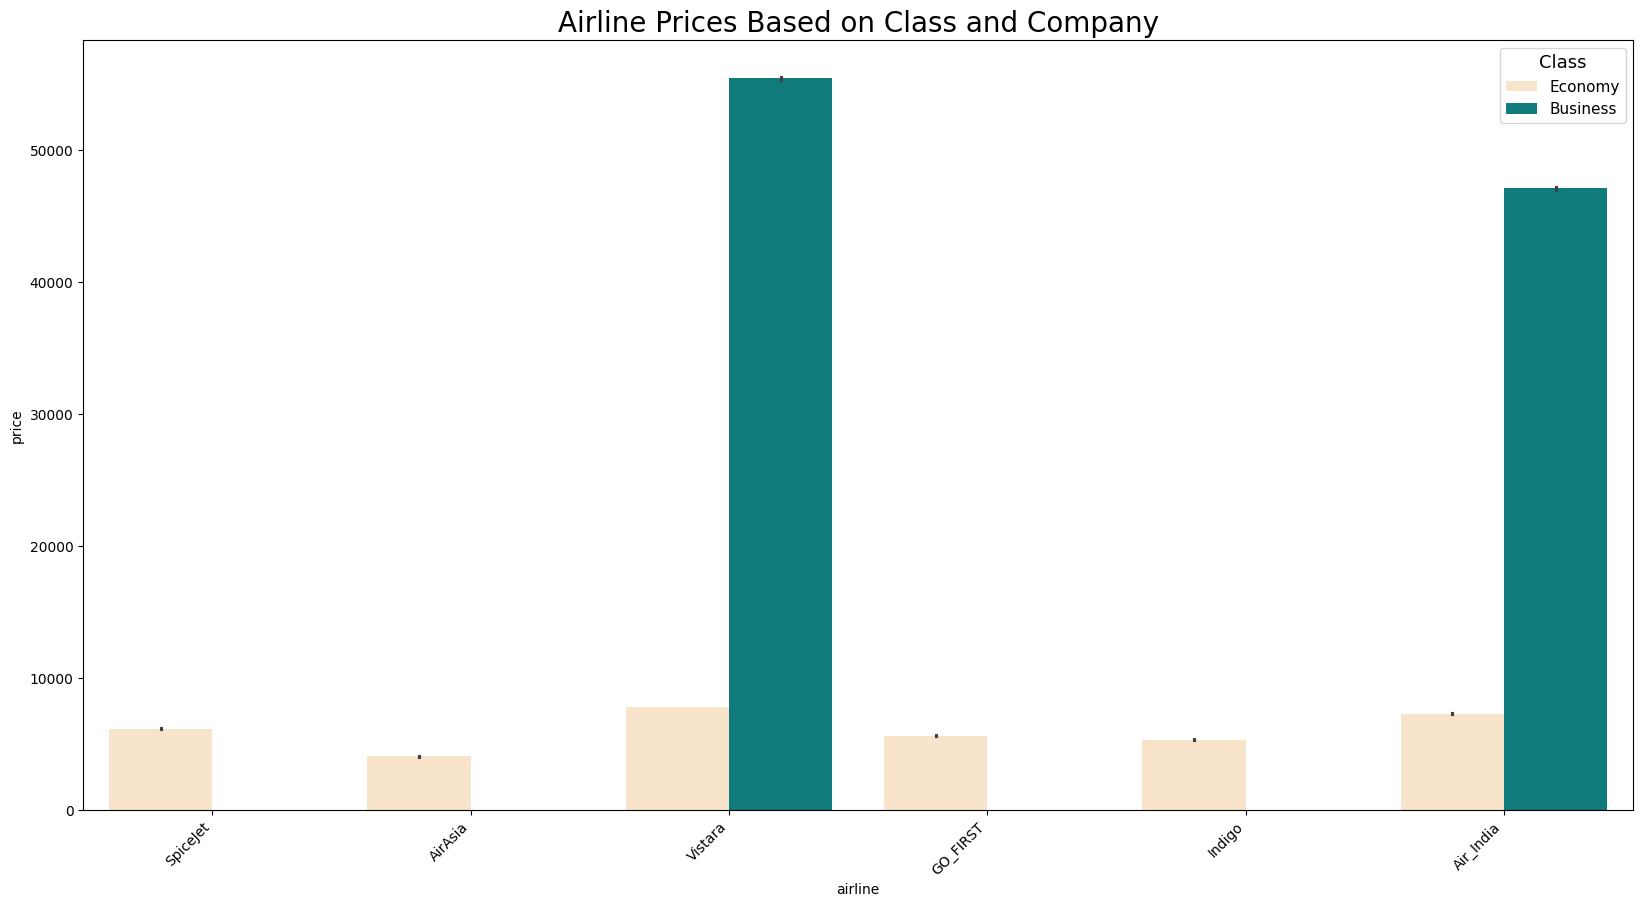

In [25]:

plt.figure(figsize=(20, 10))

# Use seaborn's barplot with custom colors
sns.barplot(
    x='airline',
    y='price',
    hue='class',
    data=df,
    palette=['bisque', 'darkcyan']  
).set_title('Airline Prices Based on Class and Company', fontsize=20)

# Customize legend
plt.legend(title='Class', title_fontsize='13', fontsize='11')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


In [26]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


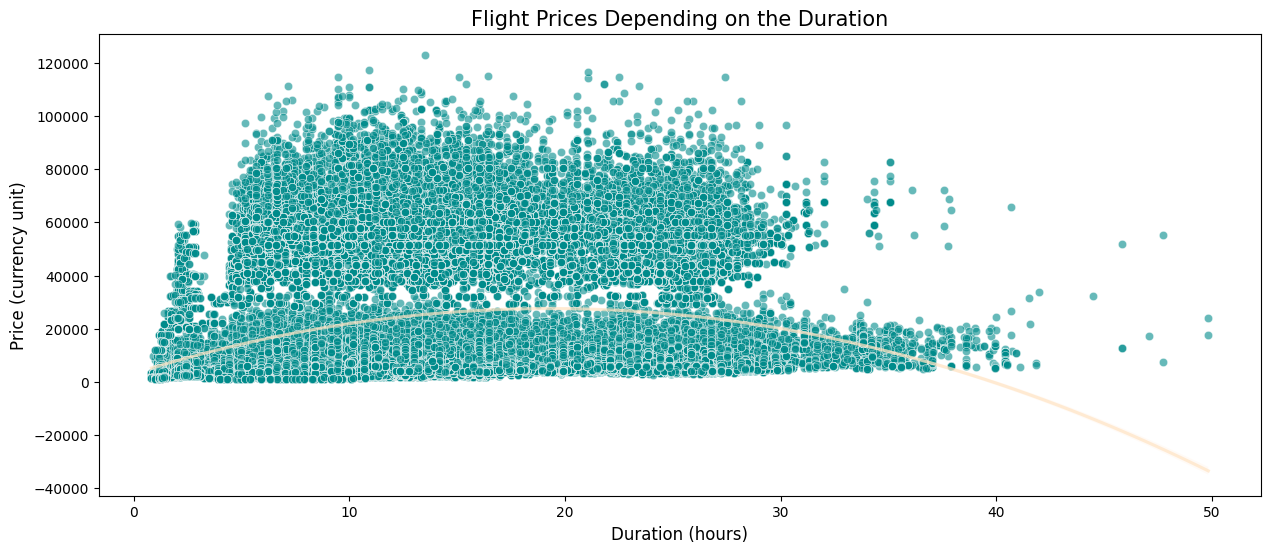

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# df = pd.read_csv('your_data.csv')  # Load your dataset here

# Set the figure size
plt.figure(figsize=(15, 6))

# Scatter plot showing the relationship between flight duration and price
scatter_plot = sns.scatterplot(x="duration", y="price", data=df, color='darkcyan', alpha=0.6)

# Overlay a polynomial regression line (order 2)
regression_plot = sns.regplot(x="duration", y="price", data=df, order=2, scatter=False, line_kws={"color": "bisque", "alpha": 0.7})

# Set the title for the plot
plt.title("Flight Prices Depending on the Duration", fontsize=15)

# Customize the axes labels
plt.xlabel("Duration (hours)", fontsize=12)
plt.ylabel("Price (currency unit)", fontsize=12)

# Display the plot
plt.show()


# Preprocessing & Transformation

In [28]:
df_temp=df.copy()

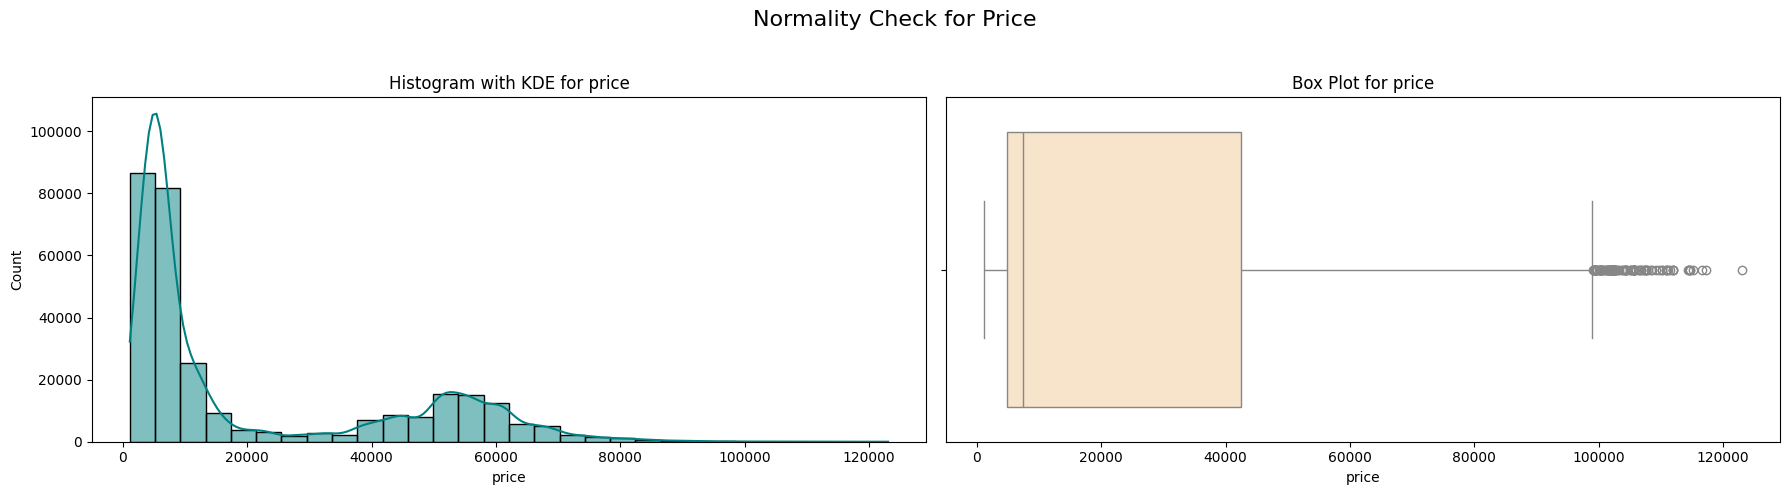

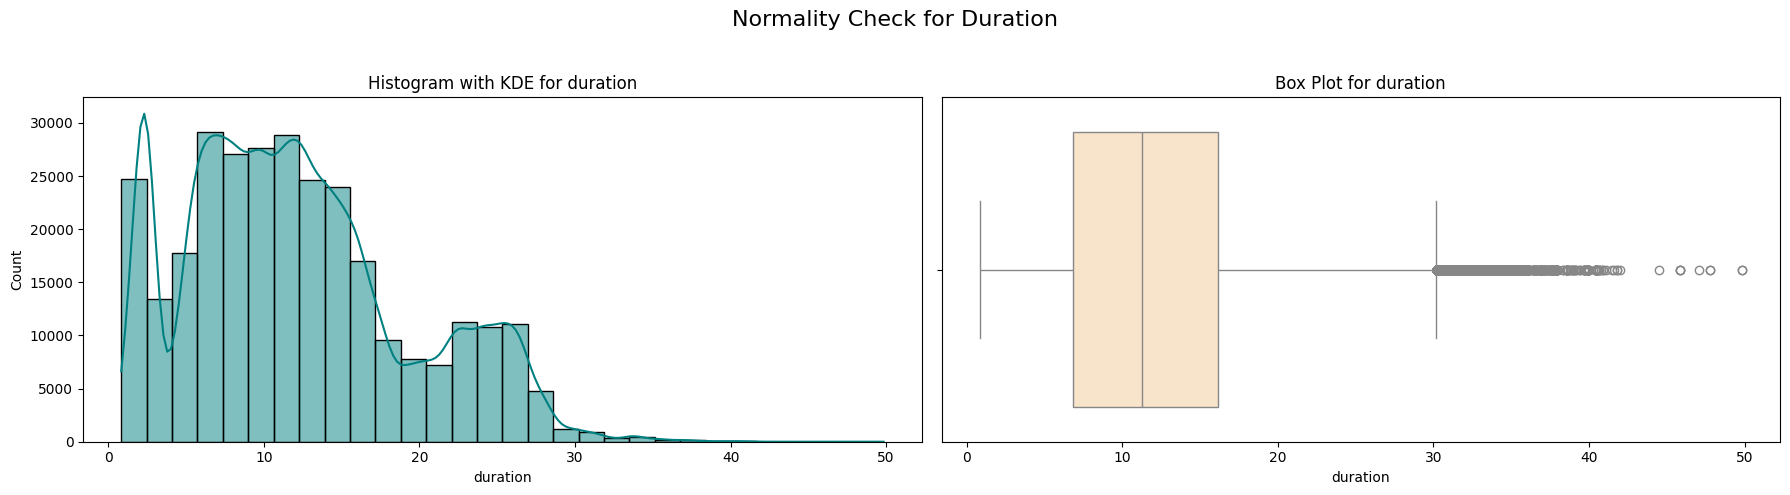

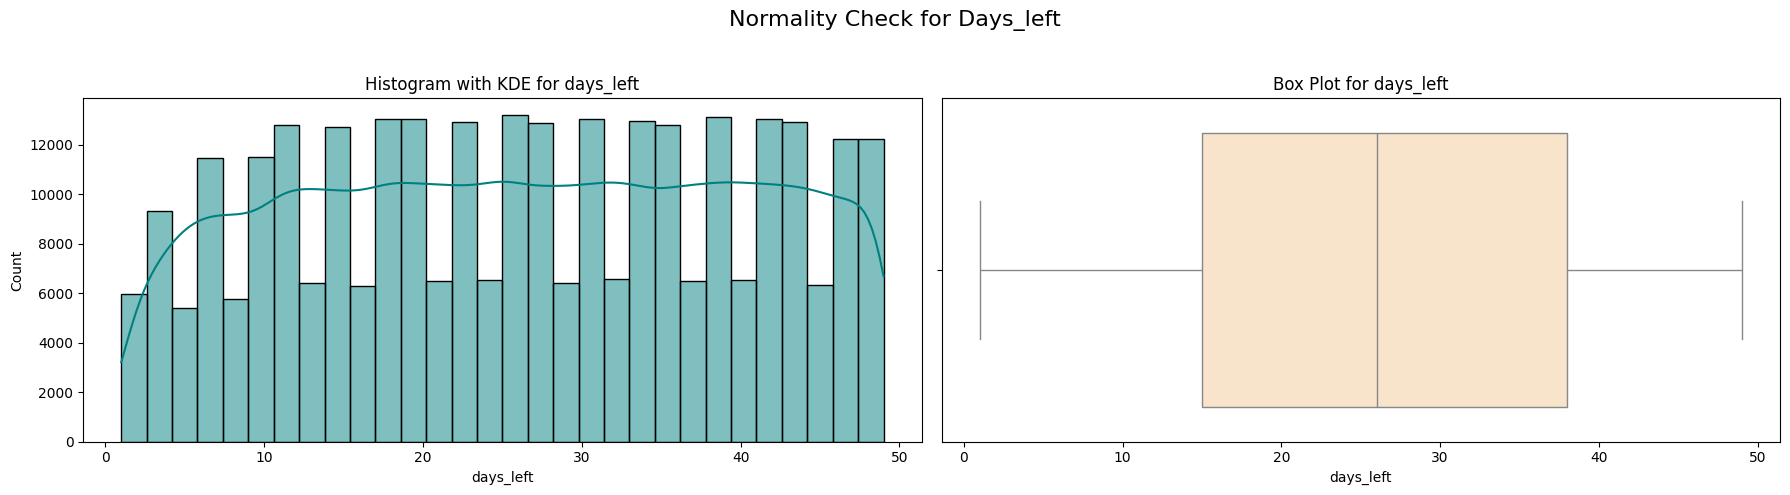

In [29]:
def plot_normality(column_name):
    data = df[column_name]
    fig, axs = plt.subplots(1, 2, figsize=(18, 5))
    sns.histplot(data, kde=True, ax=axs[0], color='teal', bins=30)
    axs[0].set_title(f'Histogram with KDE for {column_name}')
    sns.boxplot(x=data, ax=axs[1], color='bisque')
    axs[1].set_title(f'Box Plot for {column_name}')
    plt.suptitle(f'Normality Check for {column_name.capitalize()}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot normality for 'price'
plot_normality('price')

# Plot normality for 'duration'
plot_normality('duration')

# Plot normality for 'days_left'
plot_normality('days_left')


In [30]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [31]:
df_copy=df.copy()
df_copy.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [32]:
df_copy['log_duration'] = np.log1p(df_copy['duration'])
df_copy['log_price'] = np.log1p(df_copy['price'])

In [33]:
scaler = MinMaxScaler()  # or StandardScaler()
df_copy[['days_left']] = scaler.fit_transform(df_copy[['days_left']])

In [34]:
df_copy.drop(['price','duration'], axis=1, inplace=True)

In [35]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,log_duration,log_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0.0,1.153732,8.691819
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0.0,1.202972,8.691819
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0.0,1.153732,8.692322
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0.0,1.178655,8.692154
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0.0,1.202972,8.692154
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,1.0,2.405142,11.145709
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,1.0,2.435366,11.252936
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,1.0,2.696652,11.278468
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,1.0,2.397895,11.309413


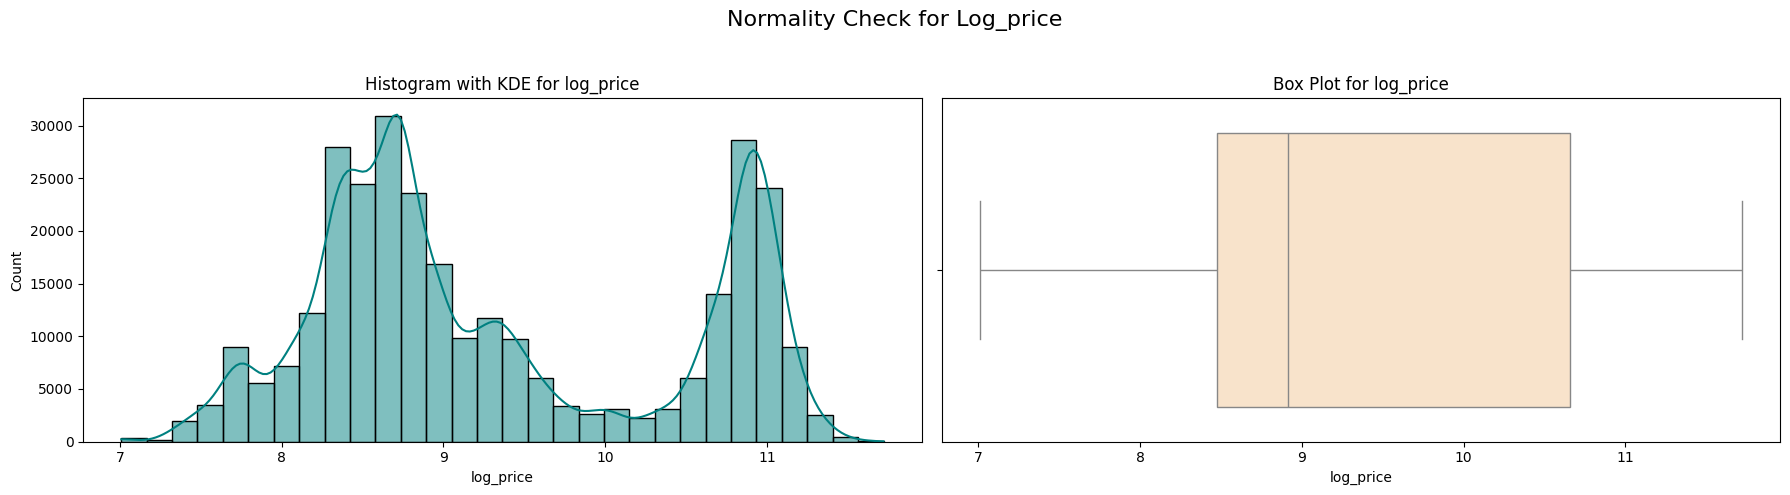

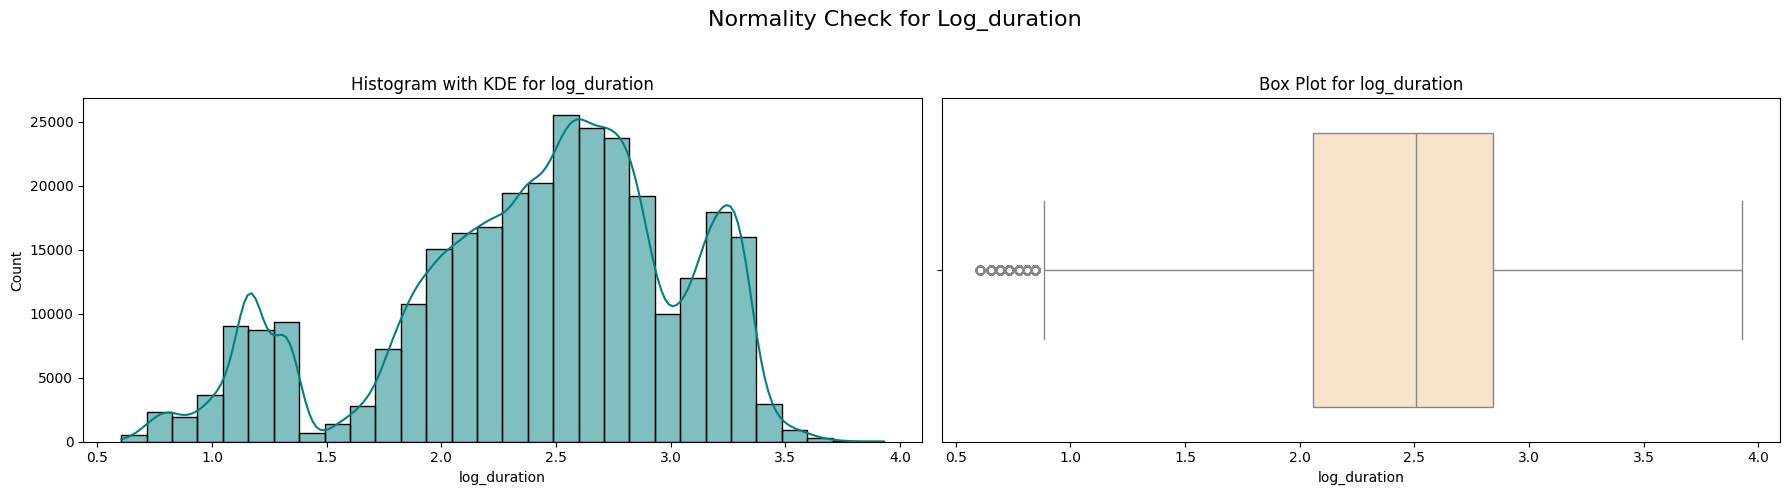

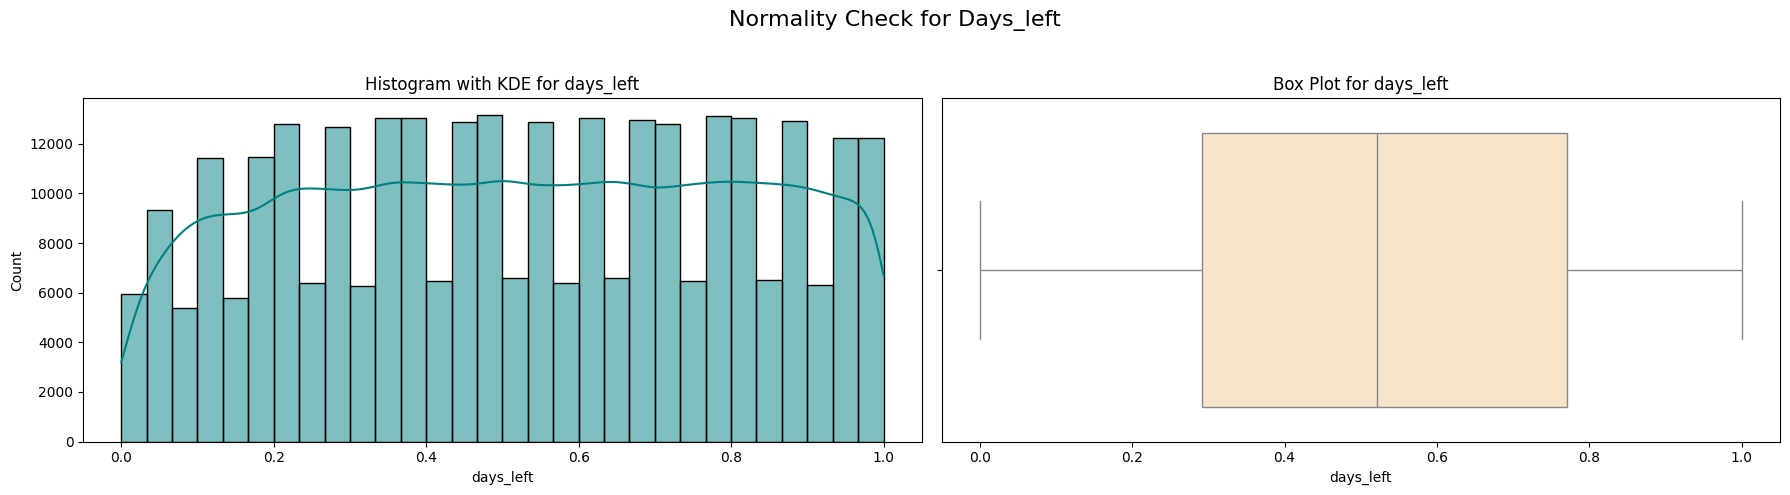

In [36]:
def plot_normality(column_name):
    data = df_copy[column_name]
    fig, axs = plt.subplots(1, 2, figsize=(18, 5))
    sns.histplot(data, kde=True, ax=axs[0], color='teal', bins=30)
    axs[0].set_title(f'Histogram with KDE for {column_name}')
    sns.boxplot(x=data, ax=axs[1], color='bisque')
    axs[1].set_title(f'Box Plot for {column_name}')
    plt.suptitle(f'Normality Check for {column_name.capitalize()}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot normality for 'price'
plot_normality('log_price')

# Plot normality for 'duration'
plot_normality('log_duration')

# Plot normality for 'days_left'
plot_normality('days_left')


In [37]:
df_copy.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,log_duration,log_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0.0,1.153732,8.691819
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0.0,1.202972,8.691819
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0.0,1.153732,8.692322
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0.0,1.178655,8.692154
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0.0,1.202972,8.692154


In [38]:
df_copy['flight'].describe()

count     300153
unique      1561
top       UK-706
freq        3235
Name: flight, dtype: object

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   days_left         300153 non-null  float64
 9   log_duration      300153 non-null  float64
 10  log_price         300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


In [40]:
df_encoded = pd.get_dummies(df_copy, columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'])


In [41]:
numerical_features = ['log_duration']
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])



In [42]:
df_encoded.head()

,flight,days_left,log_duration,log_price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,SG-8709,0.0,-1.982868,8.691819,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
1,SG-8157,0.0,-1.905016,8.691819,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,True
2,I5-764,0.0,-1.982868,8.692322,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,UK-995,0.0,-1.943463,8.692154,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
4,UK-963,0.0,-1.905016,8.692154,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,True


In [43]:
df_encoded = df_encoded.drop('flight', axis=1)


In [44]:
df_encoded

,days_left,log_duration,log_price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0.0,-1.982868,8.691819,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True
1,0.0,-1.905016,8.691819,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
2,0.0,-1.982868,8.692322,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,0.0,-1.943463,8.692154,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
4,0.0,-1.905016,8.692154,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1.0,-0.004331,11.145709,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
300149,1.0,0.043456,11.252936,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
300150,1.0,0.456561,11.278468,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
300151,1.0,-0.015787,11.309413,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


# Model training and evaluation

In [51]:
X = df_encoded.drop([ 'log_price'], axis=1)  # Features
y = df_encoded['log_price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
nn_model = MLPRegressor(random_state=42, max_iter=500)  # Example parameters
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)




In [52]:
from sklearn.metrics import r2_score, mean_absolute_error

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, r2, mae

# Evaluate Linear Regression model
mse_lr, rmse_lr, r2_lr, mae_lr = evaluate_model(y_test, y_pred_lr)
print(f'Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}, MAE: {mae_lr}')

# Evaluate Random Forest model
mse_rf, rmse_rf, r2_rf, mae_rf = evaluate_model(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}, MAE: {mae_rf}')

mse_nn, rmse_nn, r2_nn, mae_nn = evaluate_model(y_test, y_pred_nn)
print(f'Neural Network - MSE: {mse_nn}, RMSE: {rmse_nn}, R²: {r2_nn}, MAE: {mae_nn}')

mse_gb, rmse_gb, r2_gb, mae_gb = evaluate_model(y_test, y_pred_gb)
print(f'Gradient Boosting - MSE: {mse_gb}, RMSE: {rmse_gb}, R²: {r2_gb}, MAE: {mae_gb}')

Linear Regression - MSE: 0.1032149507904805, RMSE: 0.32127083713041943, R²: 0.9166641579433464, MAE: 0.25307680578980046
Random Forest - MSE: 0.01716565885838273, RMSE: 0.1310177806955328, R²: 0.986140431938737, MAE: 0.06364271645534973
Neural Network - MSE: 0.04151616289475953, RMSE: 0.20375515427777413, R²: 0.9664798135609335, MAE: 0.14517379800383126
Gradient Boosting - MSE: 0.056981873189573866, RMSE: 0.2387087622806793, R²: 0.9539927854651794, MAE: 0.17822017229935555
